# Spectrogram and the STFT

We have intuitive notion of what a high or low pitch means. Pitch refers
to our perception of the frequency of a tonal sound. The
[Fourier *spectrum*](https://en.wikipedia.org/wiki/Fourier_transform) of
a signal reveals such frequency content. This makes the spectrum an
intuitively pleasing domain to work in, because we can visually examine
signals. 

In practice, we work with discrete-time signals, such that the
corresponding time-frequency transform is the [discrete Fourier
transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). It
maps a length $N$ signal $x_{n}$ into a complex valued frequency
domain representation $X_{k}$ of *N* coefficients as

$$ X_k = \sum_{n=0}^{N-1}x_n e^{-i2\pi\frac{kn}N}. $$

For real-valued inputs, positive and negative frequency components are
complex conjugates of each other, such that we retain $N$ unique units
of information. However, since spectra are complex-valued vectors, it is
difficult to visualize them as such. A first solution would be to plot
the magnitude spectrum $|X_{k}|$ or power
spectrum $|X_{k}|^2$. Due to large differences in
the range of different frequencies, unfortunately these representations
do not easily show relevant information. 

The log-spectrum  $ 20\log_{10}\|X_k\| $ is the most common
visualization of spectra and it gives the spectrum in decibels. It is
useful because again, it gives a visualization where sounds can be
easily interpreted. 

Since Fourier transforms are covered by basic works in signal
processing, we will here assume that readers are familiar with the basic
properties of these transforms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy


# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)

window_length_ms = 30
window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5,window_length-0.5,num=window_length)

# windowing function
windowing_fn = np.sin(np.pi*n/window_length)**2 # sine-window


windowpos = np.random.randint(int((len(data)-window_length)))

datawin = data[windowpos:(windowpos+window_length)]
datawin = datawin/np.max(np.abs(datawin)) # normalize

spectrum = scipy.fft.rfft(datawin*windowing_fn)
f = np.linspace(0.,fs/2,num=len(spectrum))


plt.plot(n*1000/fs,datawin)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('A window of a signal without a windowing function (i.e. rectangular window)')
plt.axis([-10.,45.,-1.,1.])
plt.tight_layout()
plt.show()

#nx = np.concatenate(([-1000,0.],n,[window_length,window_length+1000]))
#datax = np.concatenate(([0.,0.],datawin,[0.,0.]))
#plt.plot(nx*1000/fs,datax)
#plt.xlabel('Time (ms)')
#plt.ylabel('Amplitude')
#plt.title('Signal with a rectangular window looks as if it had a discontinuity at the borders')
#plt.axis([-10.,45.,-1.,1.])
#plt.tight_layout()
#plt.show()

nx = np.concatenate(([-1000,0.],n,[window_length,window_length+1000]))
datax = np.concatenate(([0.,0.],datawin*windowing_fn,[0.,0.]))
plt.plot(nx*1000/fs,datax,label='Windowed signal')
plt.plot(n*1000/fs,windowing_fn,'--',label='Window function')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Signal with a Hann window looks as if it would be continuous')
plt.axis([-10.,45.,-1.,1.])
plt.tight_layout()
plt.show()

plt.plot(f/1000,np.abs(spectrum))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Absolute Magnitude')
plt.title('The Fourier magnitude spectrum of the window')
plt.tight_layout()
plt.show()

plt.plot(f/1000,20.*np.log10(np.abs(spectrum)))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Log-Magnitude (dB)')
plt.title('The Fourier log-spectrum of the window in decibel')
plt.tight_layout()
plt.show()


AttributeError: module 'scipy' has no attribute 'fft'

In [66]:
# interactive example of spectrum
from ipywidgets import *
import IPython.display as ipd
from ipywidgets import interactive
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)
data = data[:]
data_length = int(len(data))


def update(position_s=0.5*data_length/fs,window_length_ms=32.0):
    ipd.clear_output(wait=True)
    window_length = int(window_length_ms*fs/1000.)
    t = np.arange(0,data_length)/fs
    
    # Hann window
    window_function = np.sin(np.pi*np.arange(.5/window_length,1,1/window_length))**2 
    
    window_position = int(position_s*fs)
    if window_position > data_length-window_length: 
        window_position = data_length-window_length
       
    ix = window_position + np.arange(0,window_length,1)
    window = data[ix]*window_function

    X = scipy.fft.rfft(window.T,n=2*window_length)
    dft_length = len(X)
    f = np.arange(0,dft_length)*(fs/2000)/(dft_length)
    
    fig = plt.figure(figsize=(10, 8))
    #ax = fig.subplots(nrows=1,ncols=1)
    plt.subplot(311)
    plt.plot(t,data)
    plt.plot([position_s, position_s],[np.min(data), np.max(data)],'r--')
    plt.title('Whole signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(312)
    plt.plot(t[ix],data[ix])
    plt.title('Selected window signal at postion (s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(313)
    plt.plot(f,20.*np.log10(np.abs(X)))
    plt.title('Spectrum of window')
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Magnitude (dB)')
    plt.tight_layout()
    plt.show()
    fig.canvas.draw()
        
    


interactive_plot = interactive(update, 
                               #positions_s=widgets.FloatSlider(min=0., max=(data_length-window_length)/fs, value=1., step=0.01,layout=Layout(width='1500px')),
                               position_s=(0., data_length/fs,0.001),
                               window_length_ms=(2.0, 300.0, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '600px'
style = {'description_width':'120px'}
interactive_plot.children[0].layout = Layout(width='760px')
interactive_plot.children[1].layout = Layout(width='760px')
interactive_plot.children[0].style=style
interactive_plot.children[1].style=style
interactive_plot


interactive(children=(FloatSlider(value=1.4048072562358276, description='position_s', layout=Layout(width='760…

Speech signals are however non-stationary signals. If we transform a
spoken sentence to the frequency domain, we obtain a spectrum which is
an average of all phonemes in the sentence, whereas often we would like
to see the spectrum of each individual phoneme separately. 

By splitting the signal into shorter segments, we can focus on signal
properties at a particular point in time. Such segmentation was already
discussed in the *[windowing](Windowing)* section. 

By windowing and taking the discrete Fourier transform (DFT) of each
window, we obtain the [short-time Fourier
transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)
(STFT) of the signal. Specifically, for an input signal
$x_{n}$ and window $w_{n}$, the transform is defined as

$$ STFT\{x_n\}(h,k) = X(h,k) = \sum_{n=0}^{N-1} x_{n+h} w_n
e^{-i2\pi\frac{kn}N}. $$

The STFT is one of the most frequently used tools in speech analysis and
processing. It describes the evolution of frequency components over
time. Like the spectrum itself, one of the benefits of STFTs is that its
parameters have a physical and intuitive interpretation.

A further parallel with a spectrum is that the output of the STFT is
complex-valued, though where the spectrum is a vector, the STFT output
is a matrix. As a consequence, we cannot directly visualize the
complex-valued output. Instead, STFTs are usually visualized using their
log-spectra,  $ 20\log_{10}(X(h,k)). $ Such 2 dimensional
log-spectra can then be visualized with a heat-map known as
a [spectrogram](https://en.wikipedia.org/wiki/Spectrogram).

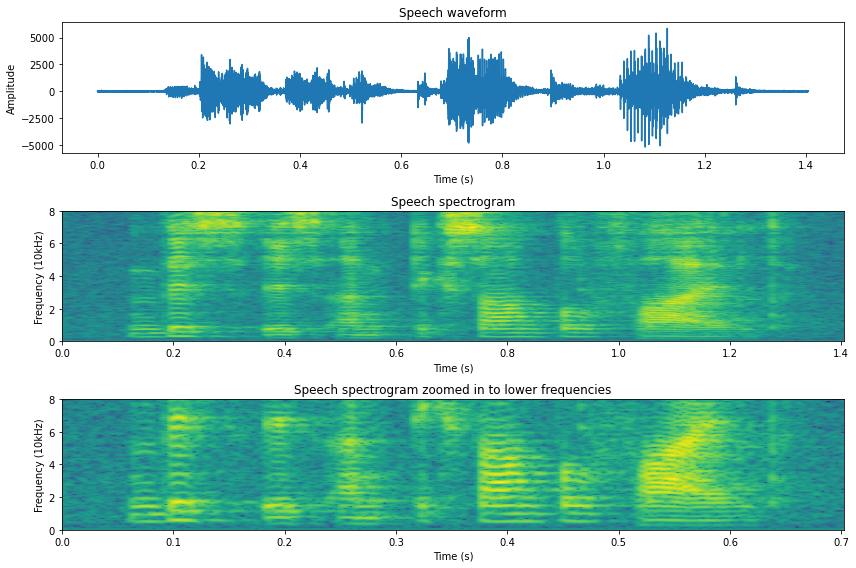

In [64]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
from scipy import signal

# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)

# resample to 16kHz for better visualization
data = scipy.signal.resample(data, len(data)*8000//fs)
fs = 16000

ipd.display(ipd.Audio(data,rate=fs))

# window parameters in milliseconds
window_length_ms = 30
window_step_ms = 5

window_step = int(np.round(fs*window_step_ms/1000))
window_length = int(np.round(fs*window_length_ms/1000))
window_count = int(np.floor((data.shape[0]-window_length)/window_step)+1)

# windowing function
windowing_fn = np.sin(np.pi*np.linspace(0.5,window_length-0.5,num=window_length)/window_length)**2 # Hann-window

spectrogram_matrix = np.zeros([window_length,window_count],dtype=complex)
for window_ix in range(window_count):    
    data_window = np.multiply(windowing_fn,data[window_ix*window_step+np.arange(window_length)])
    spectrogram_matrix[:,window_ix] = np.fft.fft(data_window)
    
fft_length = int((window_length+1)/2)

t = np.arange(0.,len(data),1.)/fs
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(t,data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech waveform')
plt.subplot(312)
plt.imshow(20*np.log10(0.2+np.abs(spectrogram_matrix[range(fft_length),:])),origin='lower',aspect='auto',extent=[0.,len(data)/fs,0.,fs/2000])
#plt.xticks(np.arange(0.,len(data)/fs,0.5));
plt.xlabel('Time (s)')
#plt.yticks(np.arange(0,fft_length,fft_length*10000/fs));
plt.ylabel('Frequency (10kHz)');
plt.title('Speech spectrogram')
plt.subplot(313)
plt.imshow(20*np.log10(0.2+np.abs(spectrogram_matrix[range(fft_length//2),:])),origin='lower',aspect='auto',extent=[0.,.5*len(data)/fs,0.,fs/2000])
plt.xlabel('Time (s)')
#plt.yticks(np.arange(0,fft_length,fft_length*10000/fs));
plt.ylabel('Frequency (10kHz)');
plt.title('Speech spectrogram zoomed in to lower frequencies')
plt.tight_layout()
plt.show()

When looking at speech in a spectrogram, many important features of the
signal can be clearly observed:

-   Horizontal lines in a comb-structure correspond to the fundamental
    frequency. 
-   Vertical lines correspond to abrupt sounds, which are often
    characterized as transients. Typical transients in speech are stop
    consonants. 
-   Areas which have a lot of energy in the high frequencies (appears as
    a lighter colour), correspond to noisy sounds like fricatives.


In [1]:
from ipywidgets import *
import IPython.display as ipd
from ipywidgets import interactive
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)
data = data[:]
data_length = int(len(data))


def update(window_length_ms=32.0, window_step_ms=16.0):
    ipd.clear_output(wait=True)
    window_length = int(window_length_ms*fs/1000.)
    window_step = int(window_step_ms*fs/1000.)
    window_count = (data_length - window_length)//window_step + 1
    dft_length = (window_length + 1)//2
    
    # sine window
    window_function = np.sin(np.pi*np.arange(.5/window_length,1,1/window_length))**2 
       
    windows = np.zeros([window_length, window_count])
    for k in range(window_count):
        ix = k*window_step + np.arange(0,window_length,1)
        windows[:,k] = data[ix]*window_function

    X = scipy.fft.rfft(windows.T,n=2*window_length)
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.subplots(nrows=1,ncols=1)
    ax.imshow(20.*np.log10(np.abs(X.T)),origin='lower')
    plt.axis('auto')    
    plt.show()
    fig.canvas.draw()
        
    


interactive_plot = interactive(update, window_length_ms=(2.0, 300.0, 0.5), window_step_ms=(1.,50.,0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=32.0, description='window_length_ms', max=300.0, min=2.0, step=0.5), F…